# [Data Train] Competição ML #1 - Titanic
## CRISP-DM: Evaluation
**Autor:** Wanderson Marques - wdsmarques@gmail.com

Nesse notebook é realizada a **avaliação** do modelo preditivo, onde os dados de validação são utilizados para verificar a capacidade preditiva. Essa é a quinta fase da metodologia CRISP-DM, o evaluation. 

<img src="imgs/evaluation.jpg" />

### Carregar bibliotecas

In [5]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

In [6]:
# Exibir gráficos dentro do Jupyter Notebook
%matplotlib inline

# Definir tamanho padrão para os gráficos
rcParams['figure.figsize'] = 8, 4

### Carregar dataset de validação

In [7]:
dataset = pd.read_csv('datasets/teste_split.csv')
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,1.0,5,2,46.9000
1,1,1,51.0,1,0,77.9583
2,0,2,24.0,0,0,13.0000
3,1,3,33.0,3,0,15.8500
4,1,1,21.0,2,2,262.3750


### Carregar modelo preditivo

Nesse momento o modelo preditivo já foi treinado, com os dados de treino.

In [8]:
model = joblib.load('models/model.pkl')

### Preparar os dados de validação

Para imputação em valores nulos foram utilizados os valores padrão do conjunto de treino. Age = 29.37

In [9]:
# Imputar valores nulos usando padrões do conjunto de treino
dataset.loc[dataset['Age'].isnull(), 'Age'] = 29.37

In [10]:
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,1.0,5,2,46.9000
1,1,1,51.0,1,0,77.9583
2,0,2,24.0,0,0,13.0000
3,1,3,33.0,3,0,15.8500
4,1,1,21.0,2,2,262.3750


### Separar atributos e classe 

In [11]:
X = dataset.drop(['Survived'], axis=1)
y = dataset['Survived']

### Realizar predição para conjunto de validação

In [12]:
y_pred = model.predict(X)
y_proba = model.predict_proba(X)

### Gerar matriz de confusão

Text(0.5, 15.0, 'Predicted label')

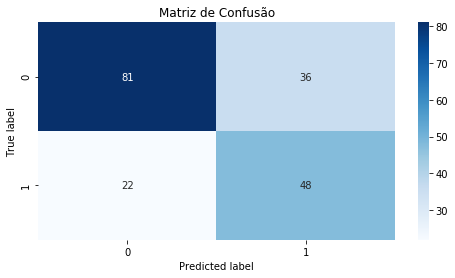

In [13]:
cm = confusion_matrix(y, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de Confusão')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Calcular métricas de classificação

In [14]:
accuracy_score(y, y_pred)

0.6898395721925134

In [15]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74       117
           1       0.57      0.69      0.62        70

    accuracy                           0.69       187
   macro avg       0.68      0.69      0.68       187
weighted avg       0.71      0.69      0.69       187



### Gerar curva ROC

In [16]:
fp, tp, thresholds = roc_curve(y, y_proba[:, 1])

Text(0.5, 1.0, 'Curva ROC')

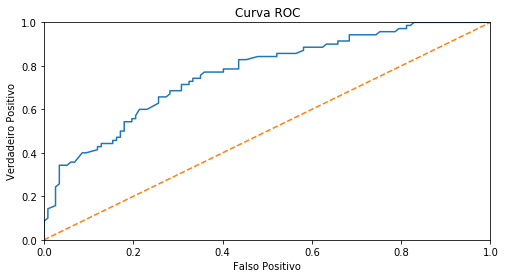

In [17]:
plt.plot(fp, tp)

plt.plot([0, 1], [0, 1], '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC')

In [18]:
# Área sob a curva ROC
auc(fp, tp)

0.7669719169719169